In [1]:
# May give error about which API it was compiled against; simply run this twice
import pandas as pd

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
# Convert CSV files to pandas DataFrames
log_dataframes = []
for i in xrange(1, 31):
    log_file = open("log%d.csv" % i, 'r')
    log_dataframes.append(pd.read_csv(log_file, index_col=0))
    log_file.close()

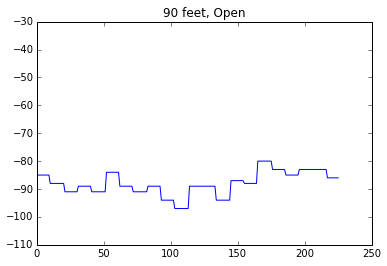

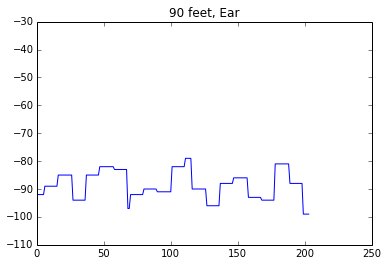

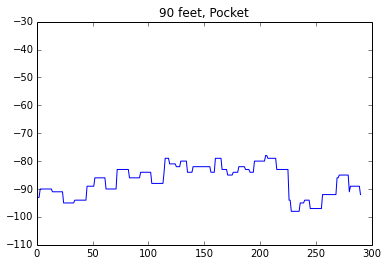

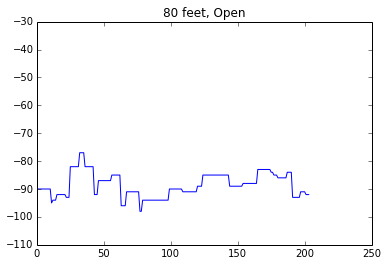

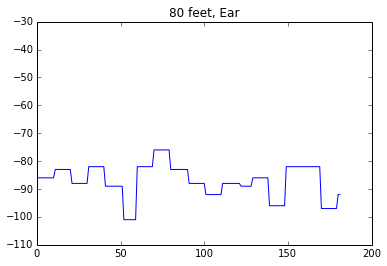

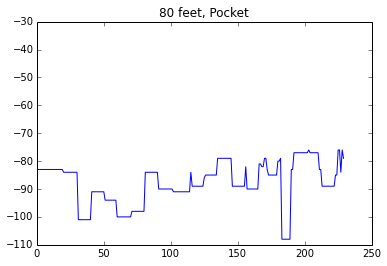

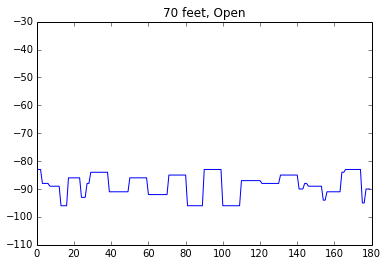

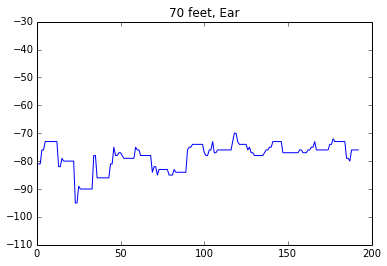

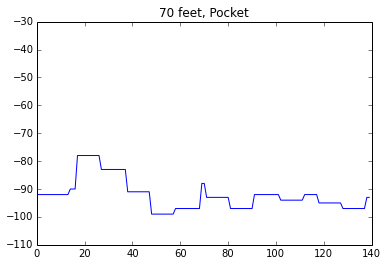

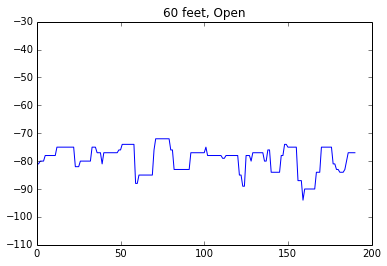

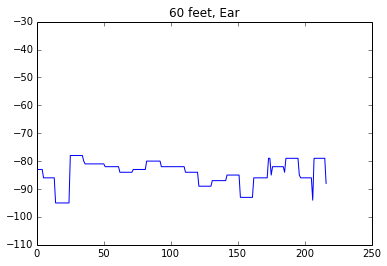

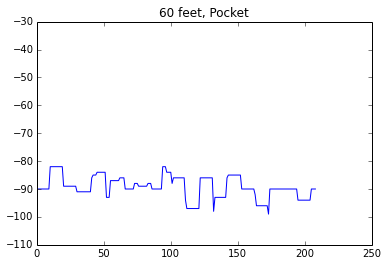

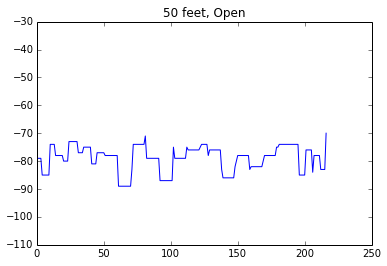

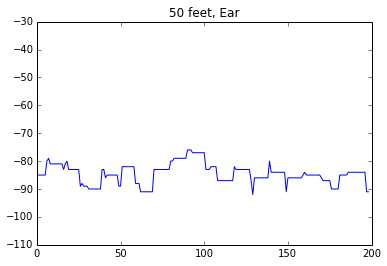

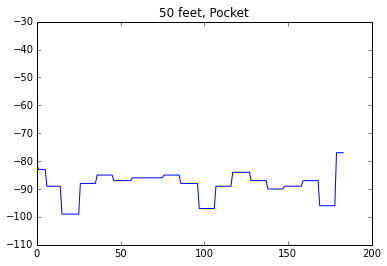

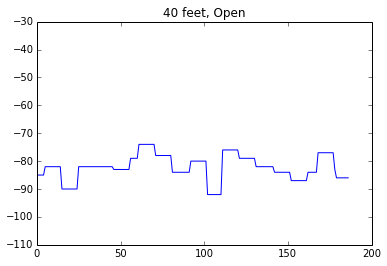

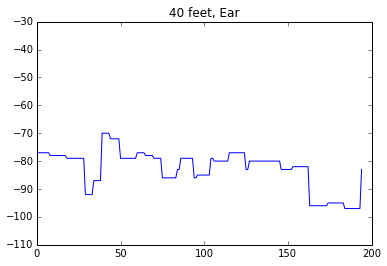

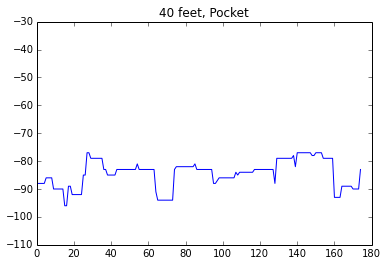

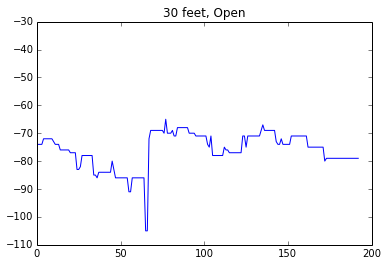

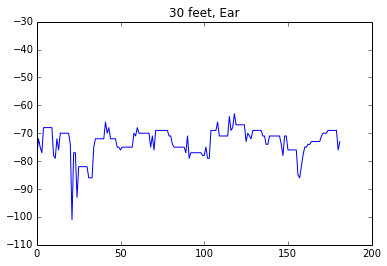

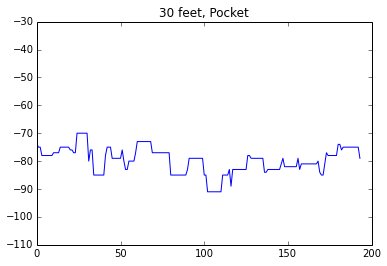

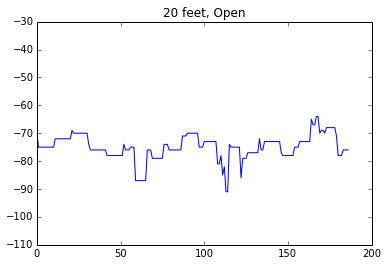

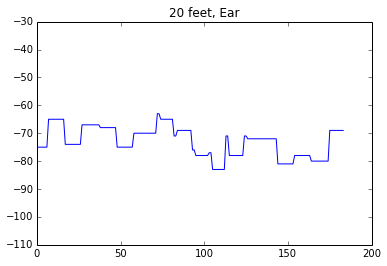

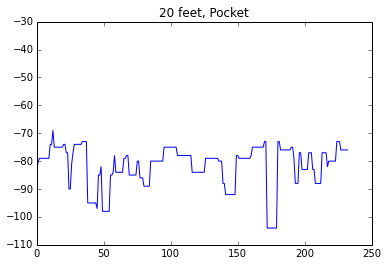

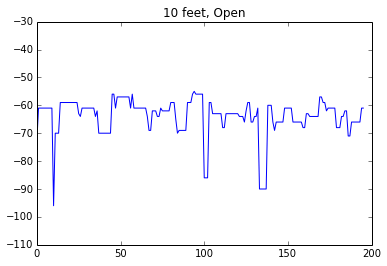

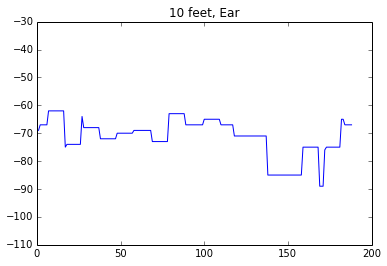

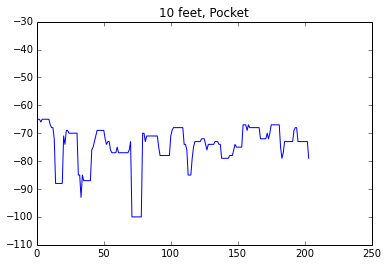

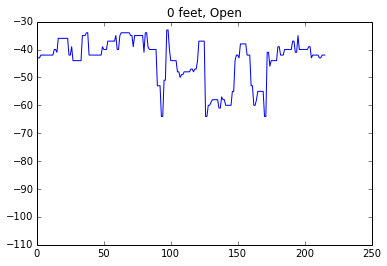

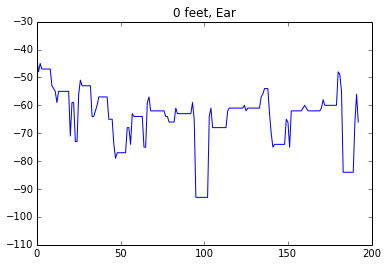

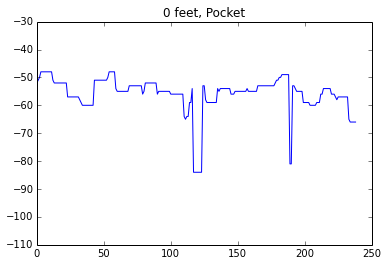

In [22]:
# Visualize RSSI over time
import matplotlib.pyplot as plt
dist = 90
rec_types = ["Open", "Ear", "Pocket"]
rec_i = 0
rssi_series = []
for i in xrange(len(log_dataframes)):
    raw_rssi_data = log_dataframes[i]["RSSI"]
    rssi_data = raw_rssi_data[raw_rssi_data != -2147483648]
    rssi_series.append(rssi_data)
    plt.plot(rssi_data)
    axes = plt.gca()
    axes.set_ylim([-110, -30])
    plt.title("%d feet, %s" % (dist, rec_types[rec_i]))
    plt.show()
    
    rec_i += 1
    if rec_i >= 3:
        rec_i = 0
        dist -= 10

In [25]:
import numpy as np
import scipy as sp

dist = 90
rec_types = ["Open", "Ear", "Pocket"]
rec_i = 0

for rssi_log in rssi_series:
    print "%d feet, %s" % (dist, rec_types[rec_i])
    print "Std Dev: %.3f dB" % np.std(rssi_log.values)
    print "Variance: %.3f dB" % np.var(rssi_log.values)
    print ""
    
    rec_i += 1
    if rec_i >= 3:
        rec_i = 0
        dist -= 10

90 feet, Open
Std Dev: 4.127 dB
Variance: 17.035 dB

90 feet, Ear
Std Dev: 4.936 dB
Variance: 24.364 dB

90 feet, Pocket
Std Dev: 5.417 dB
Variance: 29.349 dB

80 feet, Open
Std Dev: 4.243 dB
Variance: 18.004 dB

80 feet, Ear
Std Dev: 5.917 dB
Variance: 35.014 dB

80 feet, Pocket
Std Dev: 7.569 dB
Variance: 57.286 dB

70 feet, Open
Std Dev: 4.122 dB
Variance: 16.994 dB

70 feet, Ear
Std Dev: 4.785 dB
Variance: 22.897 dB

70 feet, Pocket
Std Dev: 5.547 dB
Variance: 30.771 dB

60 feet, Open
Std Dev: 4.548 dB
Variance: 20.686 dB

60 feet, Ear
Std Dev: 4.352 dB
Variance: 18.936 dB

60 feet, Pocket
Std Dev: 3.917 dB
Variance: 15.344 dB

50 feet, Open
Std Dev: 4.508 dB
Variance: 20.325 dB

50 feet, Ear
Std Dev: 3.577 dB
Variance: 12.792 dB

50 feet, Pocket
Std Dev: 4.696 dB
Variance: 22.051 dB

40 feet, Open
Std Dev: 4.424 dB
Variance: 19.570 dB

40 feet, Ear
Std Dev: 6.967 dB
Variance: 48.540 dB

40 feet, Pocket
Std Dev: 4.852 dB
Variance: 23.537 dB

30 feet, Open
Std Dev: 6.320 dB
Variance